In [75]:
import pandas as pd
import nltk


# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [76]:
# Import Data
vdata = pd.read_csv('Videos_data.csv')
vdata = vdata.iloc[:, 1:]     # Remove extra un-named column
vdata.head(10)

,Video Id,Title,Description,Category
0,pAXc7z8agRU,The Most Unbelievable Hotel View! | Dhruv Rath...,We head off to the richest country on the Afri...,travel
1,bthQzQVK0NY,"How Expensive is Paris, France for Indian / To...",parisvlog #Francevlog #pratikjainvlogs Get up ...,travel
2,JJ4rRBLzc4I,Japan Travel Vlog: Traveling ALONE to Japan *B...,Japan travel vlog :) traveling alone to Japan ...,travel
3,8wvf8HxpBPM,alone in paris | solo travel VLOG,thanks for spending time with me in paris and ...,travel
4,2ZS286BOtCI,Travelling to World&#39;s Most Empty Country! 🇲🇳,"For the first time, we travel to a central asi...",travel
5,ZhYz2m6Pp_I,TRAVEL WITH US to BALI | longest travel day ev...,travel with us to BALI BABY!!! the longest tra...,travel
6,hBzpPbIpaqY,"TRAVEL VLOG ₊⋆ ☁︎ | flying to japan, airplane ...",JAPAN VLOGS ARE HEREE!! i hope you guys enjoy ...,travel
7,rMG-tO_mSkg,ಬಡತನದ ಬೇಗೆಯಲ್ಲಿ ಬೇಯುತ್ತಿರುವ CHINA 😕| ಅಯ್ಯೋ ದು...,Namaskara devru! ಸ್ವಾಗತ! Welcome to the People...,travel
8,lxLW12WLxmo,"First Impressions of KARACHI, PAKISTAN (Overwh...",Join me on a group trip! https://www.dougbarna...,travel
9,uYFtWVv5F3E,"Italy Travel Vlog: exploring Florence, Tuscany...",my first time visiting Venice and Tuscany! sha...,travel


Data Preprocessing


In [77]:
# Missing Values
num_missing_desc = vdata.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
vdata = vdata.dropna()

Number of missing values: 520


In [78]:
# Change to lowercase
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())

# Remove numbers
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+', '', x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
vdata['Title']  = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
vdata['Description']  = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
vdata['Title'] = vdata['Title'].map(lambda x: x.strip())
vdata['Description'] = vdata['Description'].map(lambda x: x.strip())

# Tokenize into words
vdata['Title'] = vdata['Title'].map(lambda x: word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
vdata['Title'] = vdata['Title'].map(lambda x: [word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x: [w for w in x if not w in stop_words])
vdata['Description'] = vdata['Description'].map(lambda x: [w for w in x if not w in stop_words])

In [79]:


# Word Lemmatization
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

In [80]:
vdata.head(10)

,Video Id,Title,Description,Category
0,pAXc7z8agRU,unbelievable hotel view dhruv rathee vlogs,head richest country african continent beautif...,travel
1,bthQzQVK0NY,expensive paris france indian tourists europe ...,parisvlog francevlog pratikjainvlogs get lensk...,travel
2,JJ4rRBLzc4I,japan travel vlog travel alone japan business ...,japan travel vlog travel alone japan fly ana b...,travel
3,8wvf8HxpBPM,alone paris solo travel vlog,thank spend time paris remember use link https...,travel
4,2ZS286BOtCI,travel worlds empty country,first time travel central asian country situat...,travel
5,ZhYz2m6Pp_I,travel us bali longest travel day ever,travel us bali baby longest travel day lol sta...,travel
6,hBzpPbIpaqY,travel vlog fly japan airplane vlog amp first ...,japan vlogs heree hope guy enjoy new little ed...,travel
7,rMG-tO_mSkg,ಬಡತನದ china dr bro,namaskara devru welcome people republic china ...,travel
8,lxLW12WLxmo,first impressions karachi pakistan overwhelm,join group trip httpswwwdougbarnardtravelcomtr...,travel
9,uYFtWVv5F3E,italy travel vlog explore florence tuscany venice,first time visit venice tuscany share restaura...,travel


Label Encoding classes

In [81]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(vdata.Category)
vdata.Category = le.transform(vdata.Category)
vdata.head(10)

,Video Id,Title,Description,Category
0,pAXc7z8agRU,unbelievable hotel view dhruv rathee vlogs,head richest country african continent beautif...,5
1,bthQzQVK0NY,expensive paris france indian tourists europe ...,parisvlog francevlog pratikjainvlogs get lensk...,5
2,JJ4rRBLzc4I,japan travel vlog travel alone japan business ...,japan travel vlog travel alone japan fly ana b...,5
3,8wvf8HxpBPM,alone paris solo travel vlog,thank spend time paris remember use link https...,5
4,2ZS286BOtCI,travel worlds empty country,first time travel central asian country situat...,5
5,ZhYz2m6Pp_I,travel us bali longest travel day ever,travel us bali baby longest travel day lol sta...,5
6,hBzpPbIpaqY,travel vlog fly japan airplane vlog amp first ...,japan vlogs heree hope guy enjoy new little ed...,5
7,rMG-tO_mSkg,ಬಡತನದ china dr bro,namaskara devru welcome people republic china ...,5
8,lxLW12WLxmo,first impressions karachi pakistan overwhelm,join group trip httpswwwdougbarnardtravelcomtr...,5
9,uYFtWVv5F3E,italy travel vlog explore florence tuscany venice,first time visit venice tuscany share restaura...,5


Vectorizing text features using TF-IDF

In [82]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = vdata.Category
features_title = tfidf_title.fit_transform(vdata.Title).toarray()
features_description = tfidf_desc.fit_transform(vdata.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (3019, 993)
Description Features Shape: (3019, 1491)


In [83]:
features_title

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Data Analysis and Feature Exploration

<Axes: title={'center': 'Number of samples for each class'}>

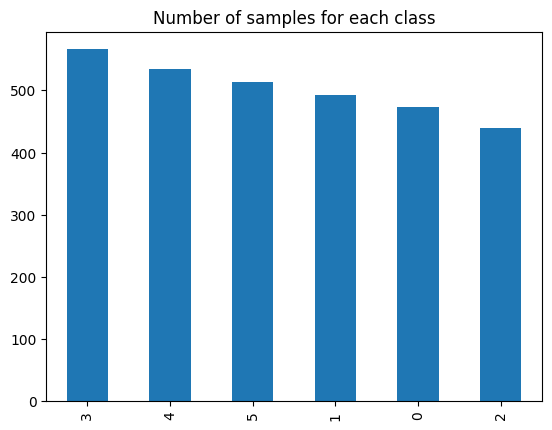

In [84]:
# Plotting class distribution
vdata['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')

In [85]:
# Best keywords for each class using Title Features
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. menggambar
. watercolor
. beginners
. easy
. landscape
. color
. draw
. acrylic
. art
. paint
Most correlated bigrams:
------------------------------
. oil paint
. paint ideas
. paint color
. paint youtubeshorts
. draw paint
. paint short
. paint beginners
. short art
. art paint
. acrylic paint


# 'food':
Most correlated unigrams:
------------------------------
. chicken
. tasty
. street
. recipes
. recipe
. mukbang
. eat
. cook
. delicious
. food
Most correlated bigrams:
------------------------------
. asmr best
. best delicious
. eat delicious
. tasty food
. mukbang cook
. food challenge
. food mukbang
. cook delicious
. street food
. delicious food


# 'history':
Most correlated unigrams:
------------------------------
. treasure
. discovery
. archaeologist
. incredible
. archaeologists
. ancient
. discoveries
. history
. archaeological
. archaeology
Most correlated bigrams:
----------------------------

In [86]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. menggambar
. step
. canvas
. beginners
. color
. easy
. acrylic
. art
. draw
. paint
Most correlated bigrams:
------------------------------
. understand method
. help use
. method help
. draw step
. clearcuteasily understand
. stepit clearcuteasily
. use things
. draw paint
. easy draw
. acrylic paint


# 'food':
Most correlated unigrams:
------------------------------
. street
. gregory
. recipes
. chicken
. mukbang
. eat
. recipe
. cook
. delicious
. food
Most correlated bigrams:
------------------------------
. bayashi cook
. million followers
. followers バヤシ
. hi im
. eat delicious
. cook delicious
. food challenge
. gregory fnaf
. street food
. delicious food


# 'history':
Most correlated unigrams:
------------------------------
. archaeologist
. treasure
. httpgooglwpktw
. discovery
. archaeologists
. history
. discoveries
. ancient
. archaeological
. archaeology
Most correlated bigrams:
-------------

Modeling and Training

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model



X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [88]:
X_train.head()

,Title,Description
1013,wro international final day,world robot olympiad wro international robotic...
3126,improve art without get better technique power...,learn creative process httpspatreoncomthefoudo...
251,australia ultimate travel guide best place vis...,australia wild beautiful place land whose colo...
3156,beautiful poster colouracrylic day night coupl...,beautiful poster colouracrylic day night coupl...
3381,wall paint ideas easy way,facebook page httpswwwfacebookcomcolourworld i...


In [89]:
y_train.head()

1013    4
3126    0
251     5
3156    0
3381    0
Name: Category, dtype: int32

In [90]:
# We use 2 different classifiers here to label a particular word to its corresponding relevant class
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)


Performance Evaluation

In [91]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

                        precision    recall  f1-score   support

         art and music       0.96      0.99      0.98       104
                  food       1.00      0.98      0.99       124
               history       0.98      0.95      0.97       111
         manufacturing       0.91      0.98      0.95       129
science and technology       1.00      0.96      0.98       161
                travel       0.97      0.97      0.97       126

              accuracy                           0.97       755
             macro avg       0.97      0.97      0.97       755
          weighted avg       0.97      0.97      0.97       755



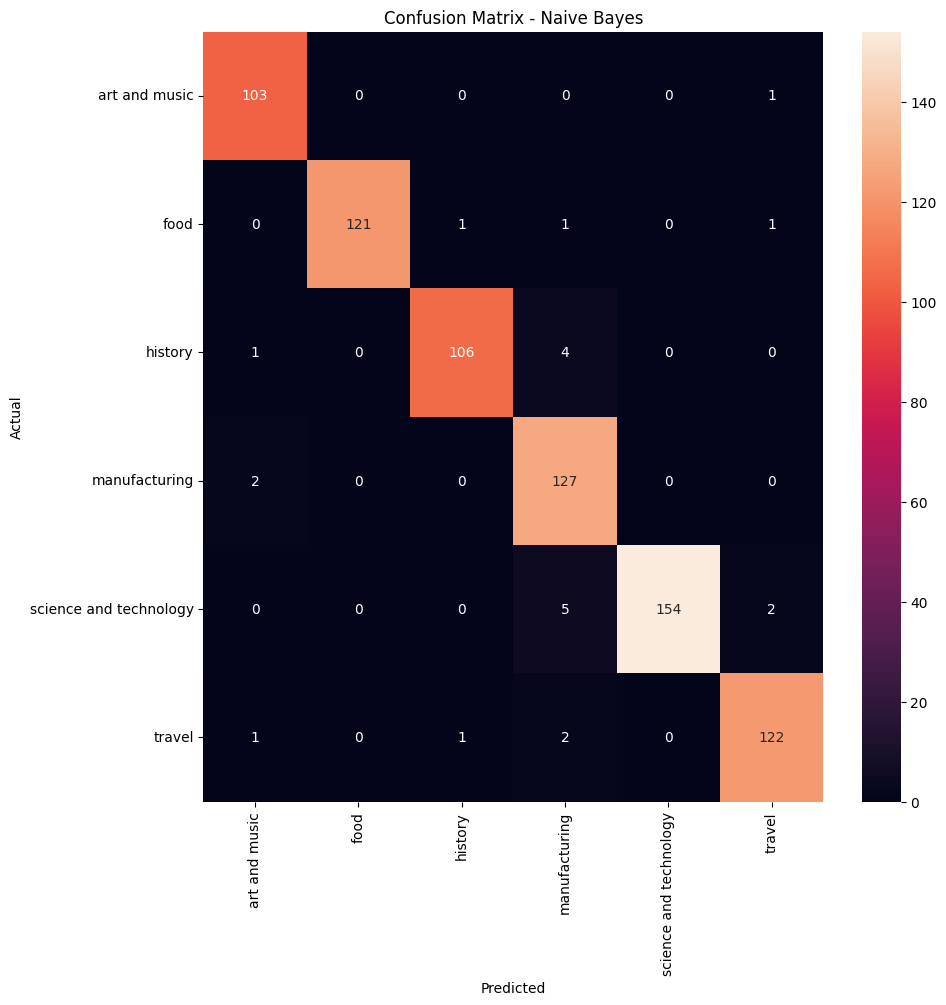

c:\Users\COM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


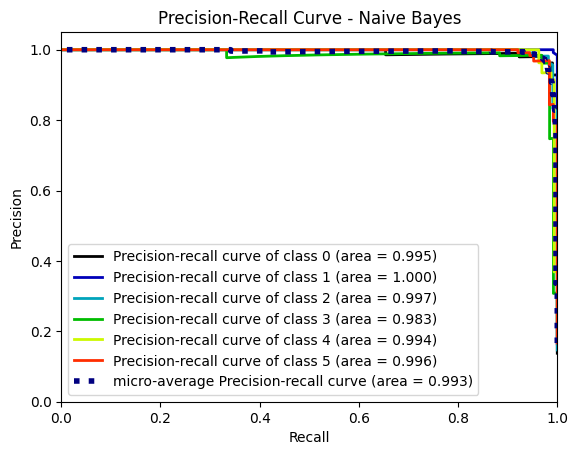

In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

                        precision    recall  f1-score   support

         art and music       0.96      1.00      0.98       104
                  food       0.99      0.99      0.99       124
               history       0.99      0.96      0.98       111
         manufacturing       0.93      0.98      0.96       129
science and technology       0.99      0.95      0.97       161
                travel       0.97      0.95      0.96       126

              accuracy                           0.97       755
             macro avg       0.97      0.97      0.97       755
          weighted avg       0.97      0.97      0.97       755



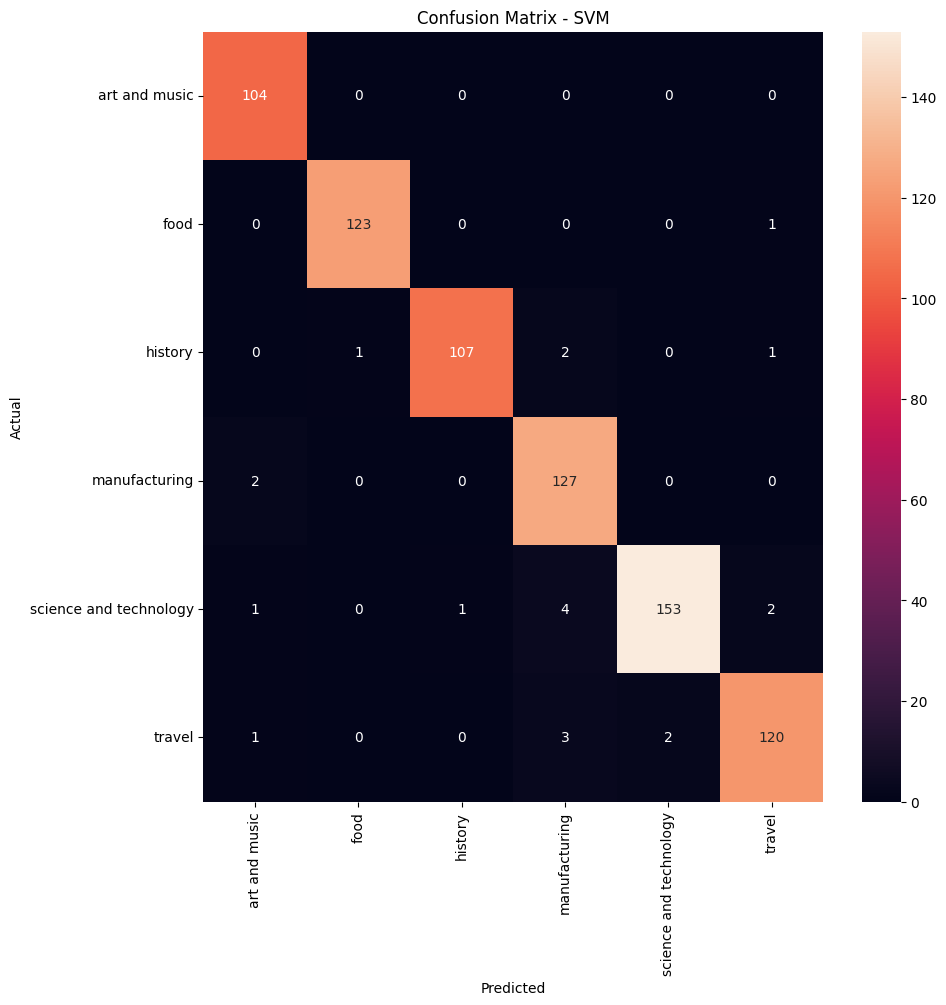

c:\Users\COM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


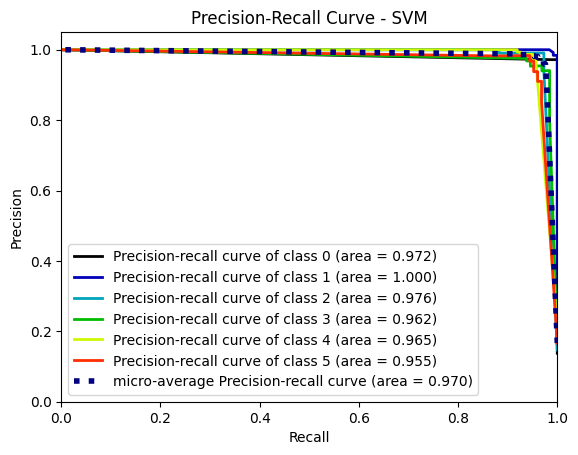

In [93]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()

Importing Advertisement Dataset

In [94]:
#import data
adata = pd.read_csv('collected_sports_data.csv' )

#delete columns which are not required
adata.drop(adata.iloc[:, 4:42], inplace = True, axis = 1) 

Data Prepocessing and cleaning

In [95]:
# Change to lowercase
adata['Title 1'] = adata['Title 1'].map(lambda x: x.lower())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.lower())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.lower())

# Remove Punctuation
adata['Title 1'] = adata['Title 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['H1-1'] = adata['H1-1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
adata['Title 1'] = adata['Title 1'].map(lambda x: x.strip())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.strip())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.strip())

In [96]:
adata.head(10)

,Original Url,Title 1,Meta Description 1,H1-1
0,https://www.adforum.com/creative-work/ad/playe...,leos inner beauty,television inner beauty for leos by xynias wet...,leos inner beauty
1,https://www.adforum.com/creative-work/ad/playe...,ninemsn indian restaurant,television indian restaurant for ninemsn by ha...,ninemsn indian restaurant
2,https://www.adforum.com/creative-work/ad/playe...,social democratic party socialdemocratic party,television socialdemocratic party for social d...,social democratic party socialdemocratic party
3,https://www.adforum.com/creative-work/ad/playe...,the observer sport the 1st,television sport the 1st for the observer by o...,the observer sport the 1st
4,https://www.adforum.com/creative-work/ad/playe...,wind history has changed,television history has changed for wind by tbw...,wind history has changed
5,https://www.adforum.com/creative-work/ad/playe...,nestlé swimming,television swimming for nestlé by publicis ita...,nestlé swimming
6,https://www.adforum.com/creative-work/ad/playe...,nestlé sprint,television sprint for nestlé by publicis italy...,nestlé sprint
7,https://www.adforum.com/creative-work/ad/playe...,nestlé volley,television volley for nestlé by publicis italy...,nestlé volley
8,https://www.adforum.com/creative-work/ad/playe...,hertz tennis,television tennis for hertz by publicis mojo,hertz tennis
9,https://www.adforum.com/creative-work/ad/playe...,natural high,television natural high for by mccann brisbane,natural high


In [98]:
import pandas as pd
def find(dec,k):
    r=[]
    for i in dec.index:
        if k in dec['Meta Description 1'][i]:
            r.append(dec['Original Url'][i])
    return r



#adata = pd.read_csv('collected_sports_data.csv' )
adata=adata[['Original Url', 'Meta Description 1']]

result=find(adata, "science") 
for i in result:
    print(" Url Link ",i)

 Url Link  https://www.adforum.com/creative-work/ad/player/12661308/yaos-comfort-food/t-mobile
 Url Link  https://www.adforum.com/creative-work/ad/player/34464346/a-lemonade-at-lunch/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34464347/are-you-pouring-on-the-pounds/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34464348/youd-never-eat/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34506119/epic-food-drogba-vs-messi/turkish-airlines
 Url Link  https://www.adforum.com/creative-work/ad/player/34513909/805-million-names-case-study/world-food-programme
 Url Link  https://www.adforum.com/creative-work/ad/player/34515038/skinny-jeans/food-and-drug-administration
 Url Link  https://www.adforum.com/creative-work/ad/player/34525148/oatly/oatly
 Url Link  https://www.adforum.com/creative-work/ad/player/34562857/first-generation-that-might-have-a-shorter-lifespan-than-their-parents/sound-food-uprising
 Url Link  https://www.ad